In [2]:
using PyPlot

$\newcommand{\Var}{\mathrm{Var}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\amax}[2]{\underset{#1}{\operatorname{argmax}}\Big[#2\Big]}$
$\newcommand{\amin}[2]{\underset{#1}{\operatorname{argmin}}\Big[#2\Big]}$
[crappy questionable graphic](http://gandenberger.org/wp-content/uploads/2014/07/Statistical_Methods.png)

## Simple Linear Regression

**Conditions:**
 - one-dimensionale in- and output: $Y,X\in\mathbb{R}$
 - i.i.d. additive zero mean Normal Distributed Error of $Y$: $$\varepsilon \sim \mathcal{N\big(0,\sigma\big)}$$
   - this includes homoscedastic of Residuals: $$\forall \varepsilon_i : \Var[\varepsilon_i]=\sigma^2$$
 - linear relationship between $X$ and $Y$


**Model:** 
$$f:\mathbb{R}\rightarrow \mathbb{R},\ x\mapsto y$$
$$y_i = \alpha + \beta\cdot x_i+\varepsilon_i$$

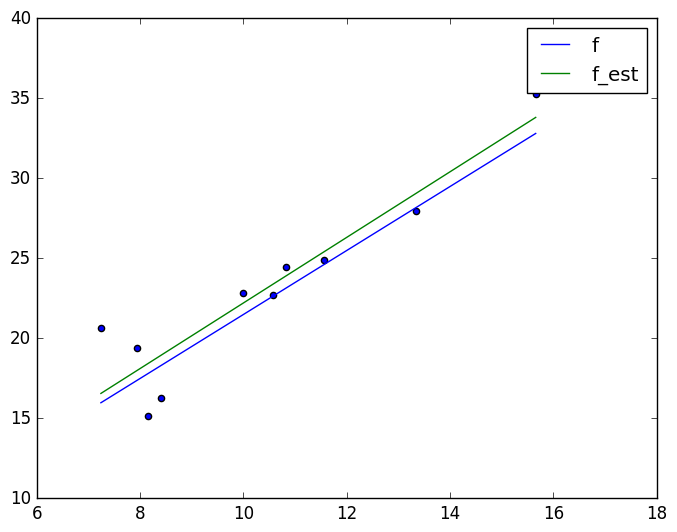

α = 1.720264, β = 2.049988


In [3]:
# this (and all following code) is a Juli cell

if !isdefined(:f)
    f(x) = 2*x + 1.5;
end

n = 10
X = randn(n)*3 + 10
Y = f(X) + randn(n)*3

#computer parameters
β = cov(X,Y)/var(X)
α = mean(Y) - β*mean(X)

x = linspace(minimum(X), maximum(X), 101)
scatter(X,Y)
plot(x, f(x))
plot(x, β*x+α)
legend(["f", "f_est"])
@printf "α = %f, β = %f\n" α β

## loss function for ML estimation of mean

**nomral distributed residuals $\rightarrow$ MSE**
$$\hat{\mu}_{ML} = \amax{\mu}{P\big(X\ \big|\ \mu\big)} 
= \amax{\mu}{\prod^n_{i=1}\mathcal{N}\big(X_i\ \big|\ \mu,\sigma\big)}$$
$$= \amax{\mu}{\sum^n_{i=1}\ln\mathcal{N}} = \amax{\mu}{\sum^n_{i=1}-\frac{(x-\mu)^2}{2\sigma^2}}$$
$$ = \amin{\mu}{\sum^n_{i=1}\big(x-\mu\big)^2}$$

**laplace distributed residuals $\rightarrow$ MAE**
$$ \hat{\mu}_{ML} = \amin{\mu}{\sum^n_{i=1}\big|\ x-\mu\ \big|\ }$$

## Ordinary Least Squares
- multi-dimensional input one-dimensional output: $X\in \mathbb{R}^m$ and $Y\in \mathbb{R}$.


$$f:\mathbb{R}^m\rightarrow \mathbb{R},\ \mathbf{x}\mapsto y$$

$$ y = \sum^n_{i=1}\sum^m_{j=1}\beta_j\phi_{ij} =\Phi^\top\beta $$

Desingmatrix: $\Phi \in R^{n\times m} $

$ \hat{\beta} = \amin{\beta}{\sum^n_{i=0}\big(y_i - \beta\phi_i\big)^2} = (\Phi^\top \Phi)^{-1}\Phi^T\mathbf{y} = \Phi^\dagger \mathbf{y}$
[proof](https://en.wikipedia.org/wiki/Proofs_involving_ordinary_least_squares#Least_squares_estimator_for_.CE.B2)


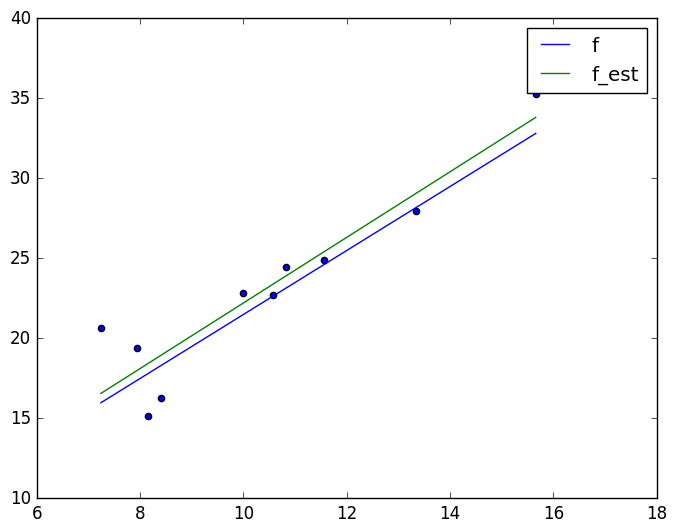

β = [1.72026; 2.04999]


In [6]:
Φ = [ones(n) X]
β = pinv(Φ)*Y''

x = linspace(minimum(X), maximum(X), 101)
Φeval = [ones(101) x]
scatter(X,Y)
plot(x, f(x))
plot(x, Φeval*β)
legend(["f", "f_est"])
@printf "β = %s\n" β

## regularized MSE is loss function for MAP estimation of mean for normal  residuals

**Normal Prior $\rightarrow$ $\mathcal{L}_2$-Regularization**
[reference](http://www.cs.cmu.edu/~aarti/Class/10701_Spring14/slides/linear_regression.pdf#page=18)
$$\hat\mu_{MAP} = \amax{\mu}{P\big(\mu\ \big|\ X\big)} = \amax{\mu}{P\big(\mu\big)P\big(X\ \big|\ \mu\big)} = \amax{\mu}{\mathcal{N}\big(\mu\ \big|\ 0,\sigma_0\big)\prod^n_{i=1}\mathcal{N}\big(X_i\ \big|\ \mu,\sigma\big)} $$

$$
= \amax{\mu}{
    -\frac{\mu^2}{2\sigma_0^2}
    -\sum^n_{i=1}\frac{(x_i-\mu)^2}{2\sigma^2}}
= \amin{\mu}{
    \sum^n_{i=1}\frac{(x_i-\mu)^2}{\sigma^2}
    + \frac{\mu^2}{\sigma_0^2}}
$$

$$
= \amin{\mu}{
    \sum^n_{i=1}\big(x_i-\mu\big)^2
    + \frac{\sigma^2}{\sigma_0^2}\mu^2}
= \amin{\mu}{
    \big|\big|x_i-\mu\big|\big|_2^2
    + \lambda\big|\big|\mu\big|\big|^2_2}
$$

**Laplace Prior $\rightarrow$ $\mathcal{L}_1$-Regularization**
$$
\hat\mu_{MAP} = \amin{\mu}{
    \big|\big|x_i-\mu\big|\big|_2^2
    + \lambda\big|\big|\mu\big|\big|_1}
$$
    
[Bayesian Interpretation of Kernel Regulrization](https://en.wikipedia.org/wiki/Bayesian_interpretation_of_kernel_regularization)

## MAP closed form
$$ \beta_{MAP}= (\Phi^\top \Phi + \lambda \operatorname{I})^{-1}\Phi^\top \mathbf{y}$$

$\mathcal{L}_1$-Regularization has not closed form in the general case! [reference](http://stats.stackexchange.com/questions/174003/why-is-there-no-closed-form-lasso-solution)

# Bayesian Estimation

[Checking whether a coin is fair](https://en.wikipedia.org/wiki/Checking_whether_a_coin_is_fair)
...

[Conjugate Bayesian analysis of the Gaussian distribution](https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf)